In [1]:
import os
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
modelFile = "models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = "models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "coco_class_labels.txt"

if not os.path.isdir('models'):
    os.mkdir('models')

if not os.path.isfile(modelFile):
    os.chdir("models")
    urllib.request.urlretrieve("http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz", "ssd_mobilenet_v2_coco_2018_03_29.tar.gz")

    !tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

    os.remove('ssd_mobilenet_v2_coco_2018_03_29.tar.gz')

    os.chdir("..")

In [3]:
with open(classFile) as fp:
    labels = fp.read().split("\n")
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


In [4]:
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [6]:
def detectObjects(net, im):
    dim = 300
    blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0, 0, 0), swapRB=True, crop=False)

    net.setInput(blob)
    objects = net.forward()
    return objects

In [7]:
def displayText(im, text, x, y):
    textSize = cv2.getTextSize(text, FONTFACE, FONTSCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]

    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0, 0, 0), cv2.FILLED)
    cv2.putText(im, text, (x, y-5), FONTFACE, FONTSCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)

In [8]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONTSCALE = 0.7
THICKNESS = 1

def displayObjects(im, objects, threshold = 0.25):
    rows = im.shape[0]; cols = im.shape[1]
    for i in range (objects.shape[2]):
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])

        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols) - x
        h = int(objects[0, 0, i, 6] * rows) - y

        if score > threshold:
            displayText(im, "{}: {:.2f}".format(labels[classId], score), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)

    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30, 10)); plt.imshow(mp_img); plt.show()

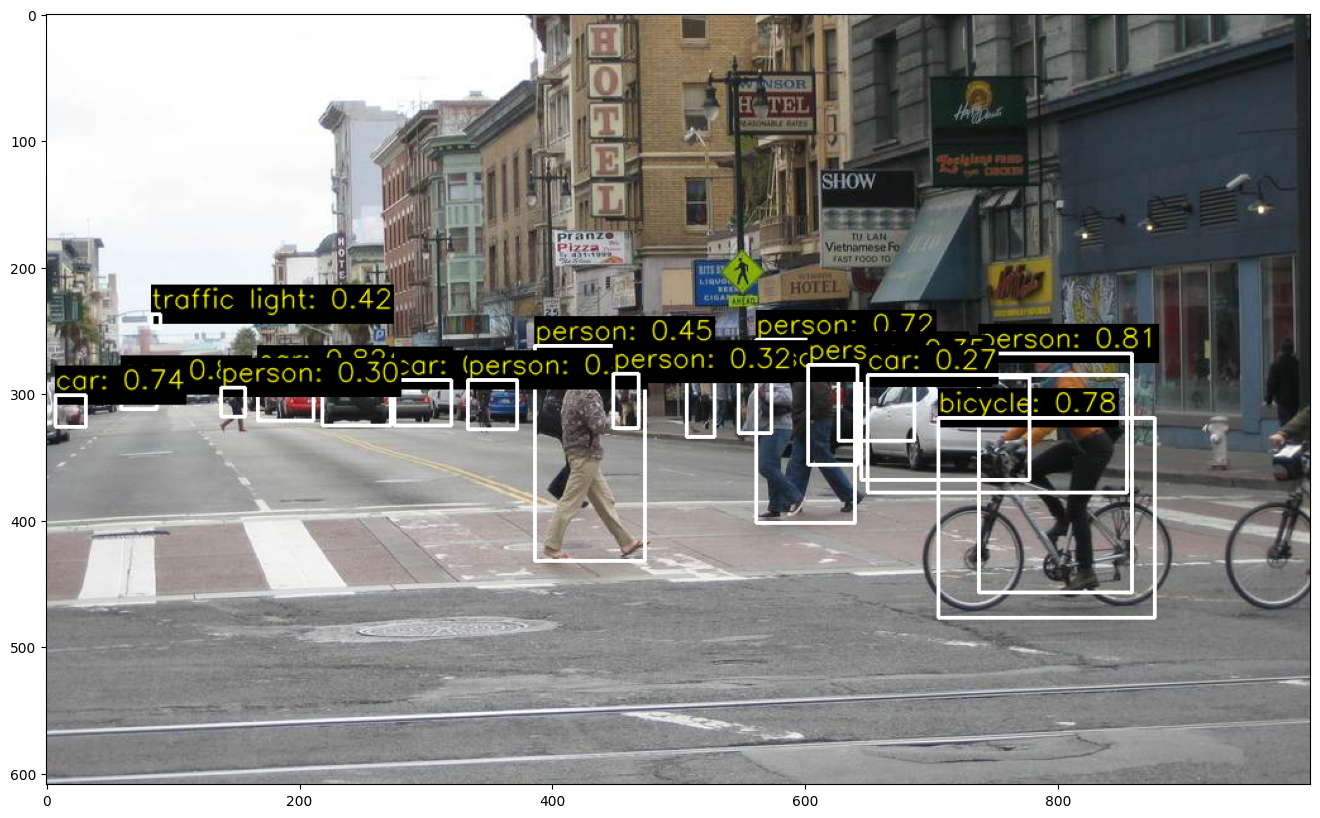

In [10]:
im = cv2.imread("images/street.jpg")
objects = detectObjects(net, im)
displayObjects(im, objects)

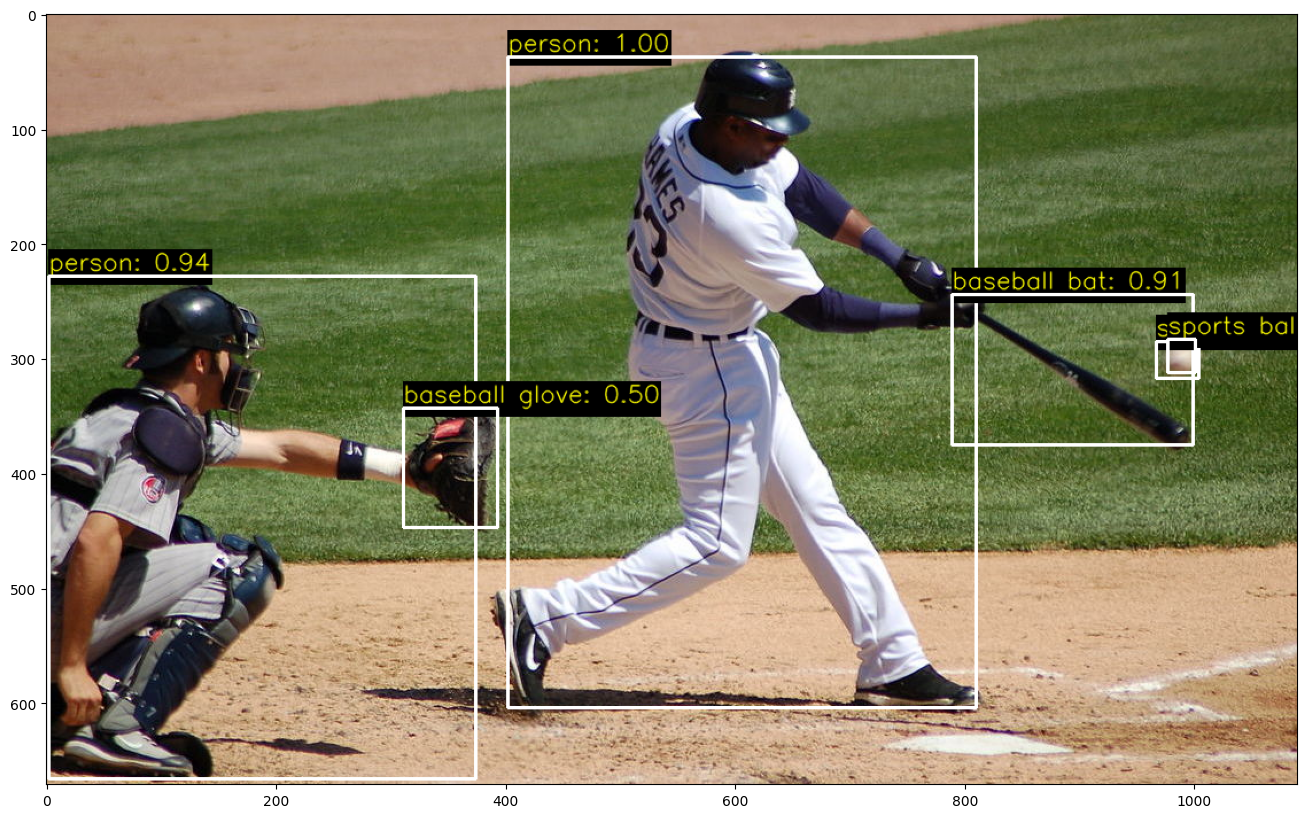

In [11]:
im = cv2.imread("images/baseball.jpg")
objects = detectObjects(net, im)
displayObjects(im, objects, 0.2)

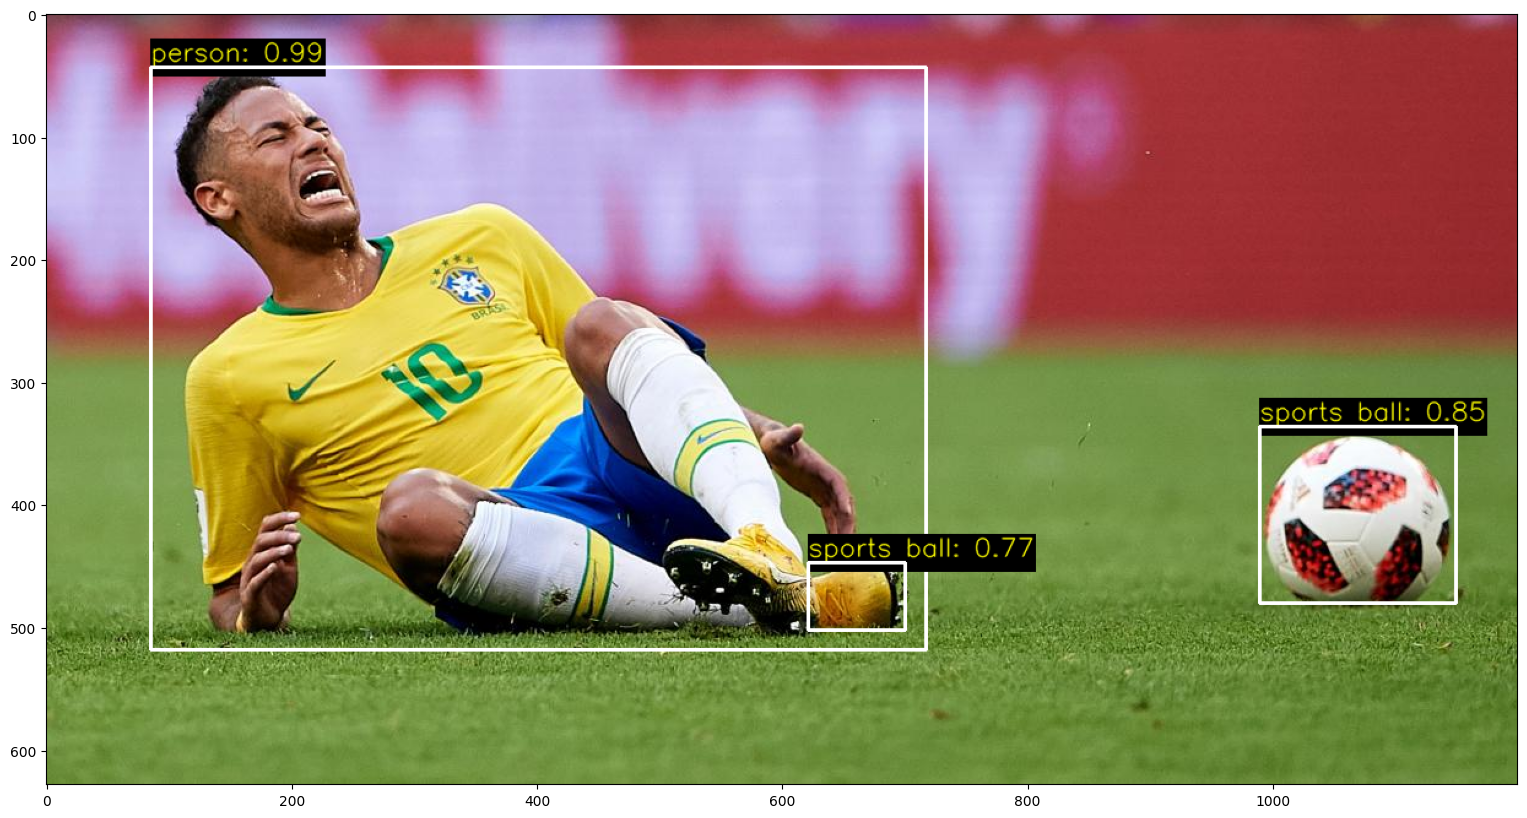

In [12]:
im = cv2.imread("images/soccer.jpg")
objects = detectObjects(net, im)
displayObjects(im, objects, 0.2)